# Machine Learning 21: Datasets: Imbalanced datasets

### 🔹 What is an Imbalanced Dataset?

An **imbalanced dataset** occurs when the distribution of target classes is not equal.
For example:

* Fraud detection: 99% normal transactions, 1% fraudulent
* Disease detection: 95% healthy, 5% diseased
* Spam classification: 80% ham, 20% spam

This imbalance causes machine learning models to be **biased towards the majority class**, because predicting the majority class yields high accuracy even without learning meaningful patterns.


#### 📊 **Why Imbalanced Datasets Are Problematic**

* **Misleading Accuracy**: High accuracy but poor performance on minority class.
* **Bias Toward Majority Class**: Models learn to favor the dominant class.
* **Poor Generalization**: Especially in sensitive applications (e.g., fraud detection, disease diagnosis).

#### ✅ **Types of Imbalance**

1. **Binary Class Imbalance** – Two classes (e.g., spam vs not spam).
2. **Multiclass Imbalance** – More than two classes with unequal distribution.
3. **Within-Class Imbalance** – Some instances within the same class are underrepresented (e.g., rare subtypes in medical data).

#### 🔍 **Evaluation Metrics for Imbalanced Data**

Accuracy is **not** reliable. Use the following:

| Metric                   | Formula                                           | Focus                                |
| ------------------------ | ------------------------------------------------- | ------------------------------------ |
| **Precision**            | TP / (TP + FP)                                    | Accuracy of positive prediction      |
| **Recall (Sensitivity)** | TP / (TP + FN)                                    | Ability to detect positive class     |
| **F1 Score**             | 2 \* (Precision \* Recall) / (Precision + Recall) | Balance between precision and recall |
| **ROC-AUC**              | Area under ROC curve                              | Trade-off between TPR and FPR        |
| **Confusion Matrix**     | TP, TN, FP, FN                                    | Visualizes prediction performance    |

#### ⚙️ **Strategies to Handle Imbalanced Data**

**A. Data-Level Approaches**

* **Oversampling**: Add more minority class samples.

  * *RandomOverSampler*
  * *SMOTE* (Synthetic Minority Oversampling Technique)
* **Undersampling**: Remove majority class samples.

  * *RandomUnderSampler*
  * *Tomek Links*, *Edited Nearest Neighbors (ENN)*

**B. Algorithm-Level Approaches**

* **Class Weight Adjustment**: Penalize wrong predictions of minority class more heavily.
* **Cost-Sensitive Learning**: Modify loss functions to incorporate imbalance.

**C. Ensemble Techniques**

* **BalancedBaggingClassifier**
* **EasyEnsemble, RUSBoost**: Combine under/oversampling with boosting.

**D. Anomaly Detection Approaches**

* Treat rare class as anomaly (e.g., one-class SVM, Isolation Forest).

In [1]:
# imbalanced datasets in machine learning using Python and relevant libraries.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# drop irrelevant columns
df.drop(columns = ["Gender","User ID"], inplace = True)

In [4]:
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


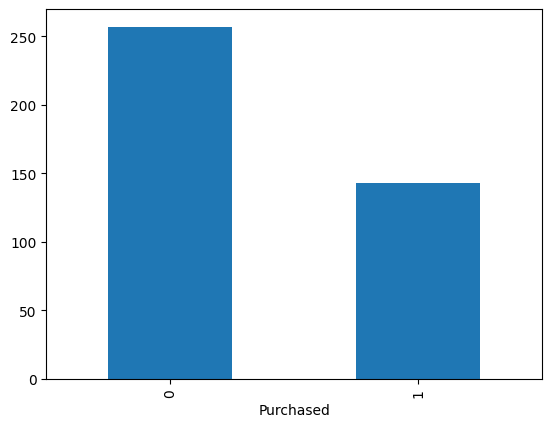

In [5]:
df["Purchased"].value_counts().plot(kind = "bar")
plt.show()

In [6]:
# Split the data into features and target variable

X = df.drop(columns = ["Purchased"])
y = df["Purchased"]

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Function to train and evaluate the model

def train_evaluate_model(X_train, y_train, X_test, y_test): 
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [9]:
# Train and evaluate the model on the original imbalanced dataset

print("Original Dataset:")
train_evaluate_model(X_train, y_train, X_test, y_test)


Original Dataset:
[[71  6]
 [13 30]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        77
           1       0.83      0.70      0.76        43

    accuracy                           0.84       120
   macro avg       0.84      0.81      0.82       120
weighted avg       0.84      0.84      0.84       120



In [10]:
#confusion matrix and classification report show poor performance on the minority class.
# Now we will apply Random Under-Sampling and Random Over-Sampling to handle the class imbalance.
# Check the class distribution in the training set
print("Class distribution in training set:")
print(y_train.value_counts())

Class distribution in training set:
Purchased
0    180
1    100
Name: count, dtype: int64


In [11]:
# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print("After Random Under-Sampling:")
train_evaluate_model(X_res, y_res, X_test, y_test)

After Random Under-Sampling:
[[63 14]
 [ 8 35]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        77
           1       0.71      0.81      0.76        43

    accuracy                           0.82       120
   macro avg       0.80      0.82      0.81       120
weighted avg       0.83      0.82      0.82       120



In [12]:
# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print("After Random Over-Sampling:")
train_evaluate_model(X_res, y_res, X_test, y_test)

After Random Over-Sampling:
[[61 16]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        77
           1       0.69      0.84      0.76        43

    accuracy                           0.81       120
   macro avg       0.79      0.81      0.80       120
weighted avg       0.82      0.81      0.81       120



In [13]:
# Check the class distribution after resampling
print("Class distribution after resampling:")
print(y_res.value_counts()) 

Class distribution after resampling:
Purchased
0    180
1    180
Name: count, dtype: int64


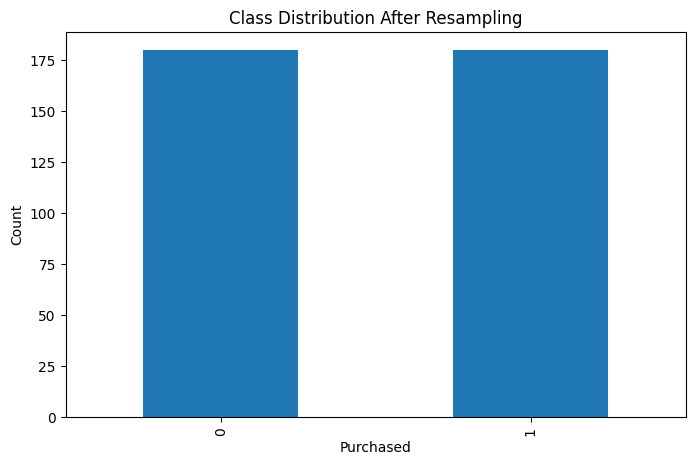

In [14]:
# Visualize the class distribution after resampling
plt.figure(figsize=(8, 5))
plt.title("Class Distribution After Resampling")
plt.xlabel("Purchased")
plt.ylabel("Count")
y_res = pd.Series(y_res)
y_res.value_counts().plot(kind = "bar")
plt.show()